# Logistic Regression

In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn import linear_model

%matplotlib inline

In [2]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [3]:
df_heard = pd.read_csv('data/heart.csv')

In [4]:
df_heard.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

In [5]:
df_heard.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

Text(0,0.5,'ADH')

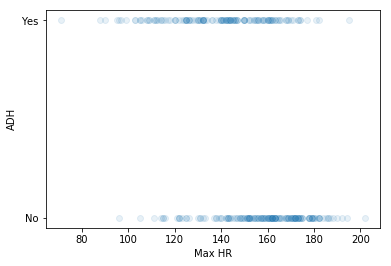

In [6]:
plt.plot(df_heard.MaxHR,df_heard.AHD,'o',alpha = 0.1)
plt.xlabel('Max HR')
plt.ylabel('ADH')

In [8]:
from sklearn.linear_model import LinearRegression
data_x = df_heard.MaxHR

data_y = df_heard.AHD.map(lambda x:0 if x=='No' else 1)

Text(0,0.5,'Probability')

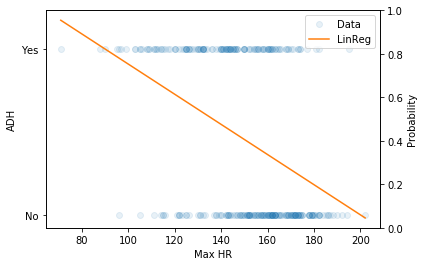

In [22]:
regr = LinearRegression(fit_intercept=True)
regr.fit(data_x.values.reshape(-1,1),data_y.values.reshape(-1,1))

x = np.linspace(min(data_x),max(data_x))
y_ = regr.predict(x.reshape(-1,1))

plt.plot(data_x,df_heard.AHD,'o',alpha = 0.1,label = 'Data')
plt.plot(x,y_,label = 'LinReg')
plt.legend(loc = 'best')

plt.xlabel('Max HR')
plt.ylabel('ADH')

par1 = plt.twinx()
par1.set_ylabel('Probability')

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression(C=100000,fit_intercept=True,solver='newton-cg')
logreg.fit(data_x.values.reshape(-1,1),data_y)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.04341112]]
Estimated beta0: 
 [6.32494975]


Text(0,0.5,'Probability')

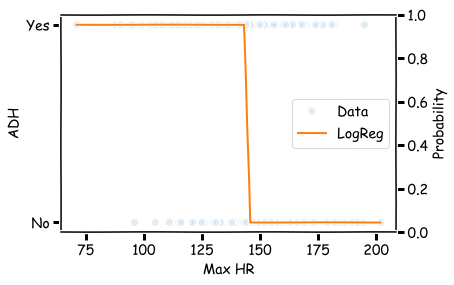

In [29]:
x = np.linspace(min(data_x),max(data_x))
y_ = logreg.predict(x.reshape(-1,1))

plt.plot(data_x,df_heard.AHD,'o',alpha = 0.1,label = 'Data')
plt.plot(x,y_,label = 'LogReg')
plt.legend(loc = 'best')

plt.xlabel('Max HR')
plt.ylabel('ADH')

par1 = plt.twinx()
par1.set_ylabel('Probability')

In [31]:
data_x = df_heard.Sex.values
data_y = df_heard.AHD.map(lambda x: 0 if x=='No' else 1).values

In [32]:
logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x.reshape(-1,1), data_y);


print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[1.27219788]]
Estimated beta0: 
 [-1.05778826]


In [36]:
data_x = df_heard[['MaxHR','Sex']]
data_y = df_heard['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True, solver='newton-cg')
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2: 
 [[-0.04508903  1.40620882]]
Estimated beta0: 
 [5.6018574]


In [38]:
df_heard['Interaction'] = df_heard.MaxHR * df_heard.Sex 

data_x = df_heard[['MaxHR','Sex', 'Interaction']]
data_y = df_heard['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True, solver='newton-cg')
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2, beta3: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2, beta3: 
 [[-0.02660848  5.41771042 -0.02708728]]
Estimated beta0: 
 [2.904446]


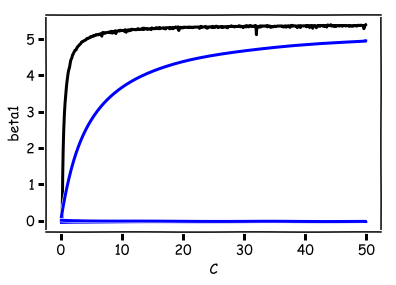

In [42]:
beta1_l1 = []
beta1_l2 = []
Cs = []

for i in range(1,500):
    C = i/10
    logitm_l1 = LogisticRegression(C = C, penalty = "l1")
    logitm_l1.fit(data_x, data_y)
    logitm_l2 = LogisticRegression(C = C, penalty = "l2", solver='newton-cg')
    logitm_l2.fit (data_x, data_y)
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    Cs.append(C)

plt.plot(Cs, beta1_l1,  color='black', lw=3)
plt.plot(Cs, beta1_l2,  color='blue', lw=3)
plt.xlabel ("C")
plt.ylabel("beta1")
plt.show()

0    151
2    148
1      4
Name: RestECG, dtype: int64


(array([151.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0., 148.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

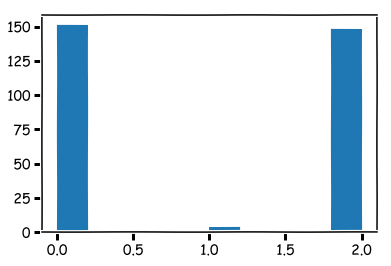

In [46]:
print(df_heard.RestECG.value_counts())
plt.hist(df_heard.RestECG.values)

In [48]:
data_y = df_heard['RestECG']

logitm = LogisticRegression(C = 10000000, solver='newton-cg')
logitm.fit (data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[ 1.07596158e-02  4.25722405e-01 -2.95718072e-03]
 [-6.82088624e-02 -9.13968663e+00  5.38609252e-02]
 [-1.17653846e-03  1.08250475e+00 -6.31864120e-03]]
Estimated beta0: 
 [-1.60689921  5.89048162  0.03332403]


In [49]:
logitm.coef_

array([[ 1.07596158e-02,  4.25722405e-01, -2.95718072e-03],
       [-6.82088624e-02, -9.13968663e+00,  5.38609252e-02],
       [-1.17653846e-03,  1.08250475e+00, -6.31864120e-03]])

In [52]:
logitm.predict(data_x)

array([2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,

In [55]:
logitm = LogisticRegression(C = 10000000, solver='newton-cg')
logitm.fit (df_heard['Sex'].values.reshape(-1,1), df_heard['AHD'])
# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[1.27219938]]
Estimated beta0: 
 [-1.05778951]


In [57]:
logitm.predict(df_heard['Sex'].values.reshape(-1,1))

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No

In [60]:
df_heart = pd.read_csv('data/heart.csv')

In [61]:
data_x = df_heart.MaxHR
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)
logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x.values.reshape(-1,1), data_y);

print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.04326016]]
Estimated beta0: 
 [6.30193148]


Text(0,0.5,'Heart disease (AHD)')

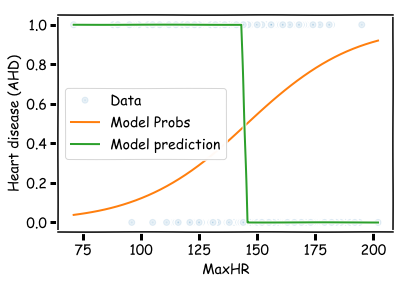

In [66]:
x=np.linspace(np.min(data_x),np.max(data_x))
y_ = logreg.predict_proba(x.reshape(-1,1))[:,0]
y_1 = logreg.predict(x.reshape(-1,1))
plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
plt.plot(x,y_, label='Model Probs')
plt.plot(x,y_1, label='Model prediction')
plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")

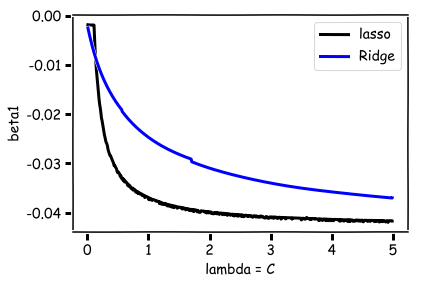

In [82]:
beta1_l1 = []
beta1_l2 = []
Cs = []
data_x = df_heart[['MaxHR']]
data_y = df_heart['AHD']

for i in range(1, 500):
    C = i/100
    logitm_l1 = LogisticRegression(C = C, penalty = "l1")
    logitm_l1.fit (data_x, data_y)
    logitm_l2 = LogisticRegression(C = C, penalty = "l2")
    logitm_l2.fit (data_x, data_y)
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    Cs.append(C)

plt.plot(np.array(Cs), beta1_l1,  color='black', lw=3,label = 'lasso')
plt.plot(np.array(Cs), beta1_l2,  color='blue', lw=3,label = 'Ridge')
plt.xlabel ("lambda = C")
plt.ylabel("beta1")
plt.legend(loc = 'best')

In [83]:
nfldata = pd.read_csv("data/NFLplaybyplay-2015.csv")


In [84]:
nfldata.head()

GameId GameDate  Quarter  Minute  Second OffenseTeam DefenseTeam  Down  \
0  2015091000  9/10/15        2       2       0         NaN         PIT     0   
1  2015091300  9/13/15        3       4      50         NaN          GB     0   
2  2015091300  9/13/15        4       0       0         NaN          GB     0   
3  2015091301  9/13/15        2       2       0         NaN         SEA     0   
4  2015091302  9/13/15        1       0       0         NaN         CAR     0   

   ToGo  YardLine      ...       IsTwoPointConversion  \
0     0         0      ...                          0   
1     0         0      ...                          0   
2     0         0      ...                          0   
3     0         0      ...                          0   
4     0         0      ...                          0   

   IsTwoPointConversionSuccessful  RushDirection  YardLineFixed  \
0                               0            NaN              0   
1                               0            NaN              0   
2                               0            NaN              0   
3                               0            NaN              0   
4                               0            NaN              0   

  YardLineDirection  IsPenaltyAccepted  PenaltyTeam  IsNoPlay  PenaltyType  \
0               OWN                  0          NaN         0          NaN   
1               OWN                  0          NaN         0          NaN   
2               OWN                  0          NaN         0          NaN   
3               OWN                  0          NaN         0          NaN   
4               OWN                  0          NaN         0          NaN   

   PenaltyYards  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 45 columns]

In [89]:
X = nfldata[["YardLine"]]

In [95]:
nfldata["PlayType"]=nfldata["IsPass"]+2*nfldata["IsRush"]

In [100]:
nfldata["PlayType"].value_counts()

1    19352
0    13620
2    13305
Name: PlayType, dtype: int64

In [103]:
logitm = LogisticRegression(C = 10000000)
logitm.fit (X, nfldata["PlayType"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[-0.01460736]
 [ 0.00635893]
 [ 0.00652455]]
Estimated beta0: 
 [-0.26422696 -0.61186328 -1.20051275]


In [104]:
X=np.arange(100)
print(logitm.predict_proba(X.reshape(-1,1))[0:10,:])
print(logitm.predict(X.reshape(-1,1)))

[[0.42692074 0.34563977 0.22743948]
 [0.42380137 0.34739801 0.22880062]
 [0.42067735 0.34915746 0.23016519]
 [0.41754902 0.35091792 0.23153306]
 [0.41441671 0.35267918 0.23290411]
 [0.41128078 0.35444103 0.23427819]
 [0.40814155 0.35620326 0.23565519]
 [0.40499938 0.35796565 0.23703497]
 [0.40185462 0.35972799 0.23841739]
 [0.39870763 0.36149006 0.23980231]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [105]:
party_df = pd.read_csv("data/gsspartyid.csv")
party_df.head()

politicalparty  income  educ  abortion  republican
0     Republican    2152     9         0           1
1     Republican     906     6         0           1
2       Democrat    1373     6         0           0
3       Democrat    1941     4         0           0
4       Democrat     355     7         0           0

In [106]:
#quick summaries of party ID data
print(party_df['politicalparty'].value_counts())
party_df.describe()

Democrat      775
Republican    532
Name: politicalparty, dtype: int64


income         educ     abortion   republican
count  1307.000000  1307.000000  1307.000000  1307.000000
mean   1088.351186     7.970926     0.456006     0.407039
std     714.286949     3.767038     0.498251     0.491470
min       1.000000     1.000000     0.000000     0.000000
25%     451.500000     5.000000     0.000000     0.000000
50%    1083.000000     7.000000     0.000000     0.000000
75%    1725.000000     9.000000     1.000000     1.000000
max    2315.000000    21.000000     1.000000     1.000000

In [110]:
party_df['logincome'] = np.log(party_df['income'].values)

train_x = party_df[['income','educ','abortion']]
train_y = party_df[['republican']]

logitm = LogisticRegression(C = 10000000)
logitm.fit (train_x,party_df['republican'])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[-5.35180568e-05 -1.22975923e-02 -9.96214453e-01]]
Estimated beta0: 
 [0.20927611]


In [111]:
import sklearn.metrics as met

In [126]:
yhat = logitm.predict_proba(train_x)[:,0]

In [127]:
yhat

array([0.50414318, 0.47826291, 0.4845024 , ..., 0.70873279, 0.71941832,
       0.72079057])

In [128]:
logitm.predict_proba(train_x)

array([[0.50414318, 0.49585682],
       [0.47826291, 0.52173709],
       [0.4845024 , 0.5154976 ],
       ...,
       [0.70873279, 0.29126721],
       [0.71941832, 0.28058168],
       [0.72079057, 0.27920943]])

In [131]:
met.confusion_matrix(party_df.republican,yhat>0.5)

array([[288, 487],
       [311, 221]], dtype=int64)

In [132]:
met.confusion_matrix(party_df.republican,yhat>0.48)

array([[143, 632],
       [138, 394]], dtype=int64)

In [133]:
met.confusion_matrix(party_df.republican,yhat>0.72)

array([[539, 236],
       [455,  77]], dtype=int64)

In [134]:
party_df.republican.value_counts()

0    775
1    532
Name: republican, dtype: int64

In [139]:
fpr, tpr, thresholds = met.roc_curve(party_df['republican'], yhat)

Text(0.5,1,'ROC Curve for the Party ID Logistic Regression Model')

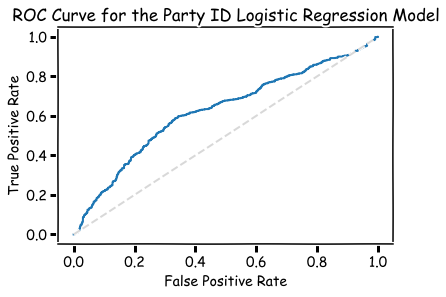

In [138]:
plt.plot(tpr,fpr)
x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for the Party ID Logistic Regression Model")

In [144]:
fpr.shape

(577,)

In [145]:
tpr.shape

(577,)

In [146]:
thresholds.shape

(577,)